# The Business Problem

**Description of problem:**

The client is a credit card company and have brought a dataset that includes some demographics and recent finance data, over the past 6 months, foa a sample of 30,000 of their account holders. This data is at the credit account level. The rowns are labeled by whether, in the next month after the 6-months historical data period, an account owner has defaulted, or in other, words, failed to make the minimum payment.

**Goal:**

Your goal is to develop a predictive model for whether an account will default next month, given demographics and historical data.

In [1]:
import pandas as pd
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [2]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

A review of data set information (Data dictionary)

- LIMIT_BAL: Amount of credit provided including individual consumer and family credit
- SEX: Gender(1 = male; 2 = female)
- EDUCATION: Education (1 = graduation school; 2 = university; 3 = high school; 4 = others)
- MARRIAGE: Marital status ( 1 = married; 2 = single; 3 = others)
- AGE: Age (year)
- PAY_1-PAY_6: A record of past payments. Past monthly payments, recorded from April to September, are stored in theses columns, PAY_1: Represents the payment status in September, and the others for before months
- BILL_AMT1-BILL_AMT6: BILL statement amount (in NT dollar),BILL_AMT1, represents the bill statement amount in September, and the others for before months
- PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar), PAY_AMT1, represents the amount paid in September, and the other for before months.

## Verifying Basic Data Integrity

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The total unique values is

In [4]:
df['ID'].nunique()

29687

and the total of rows and columns are 

In [5]:
df.shape

(30000, 25)

In [6]:
30000-29687

313

The first point is that the number of rows is large than the unique values `ID`, this can be indicated that there is some duplication of IDs. 

We can start if the question. How munch? Is one ID duplicated many times or how many IDs are duplicated?
To answer theses questions we can counts.

In [7]:
id_counts = df['ID'].value_counts()
id_counts.head() # Shows only the first five rows by default

ID
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
75938fec-e5ec    2
2a793ecf-05c6    2
Name: count, dtype: int64

In [8]:
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

We can see now that mosts IDs accur exactly once, but 313 IDs apear twice. Now we can answer part of our questions. First we know how many IDs are duplicated and no ID occurs more than twice.

In [9]:
dupe_mask = id_counts == 2  # Geting the ID which are duplicated
dupe_mask[0:5]

ID
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
75938fec-e5ec    True
2a793ecf-05c6    True
Name: count, dtype: bool

In [10]:
id_counts.index[0:5] # And your index

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6'],
      dtype='object', name='ID')

In [11]:
dupe_ids = id_counts.index[dupe_mask] # Save the index for duplicate ID

In [12]:
dupe_ids = list(dupe_ids) # Convert dupe_ids to a list
len(dupe_ids)

313

The len of dupe_ids agree with number of duplicate IDs.
Now we can move on to see if something can be different between these duplicate entries. 

In [13]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15879,7c9b7473-cc2f,90000,2,1,1,29,0,0,0,0,...,27751,20292,14937,2967,2007,1429,1092,412,263,0
15979,7c9b7473-cc2f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29646,90330d02-82d9,70000,1,2,1,29,0,0,0,0,...,10694,27908,11192,2009,1404,3016,20001,2000,5002,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that one rows has the information and the other only zero value.
Now we can create a Boolean matrix of the same size as the the entire DataFrame

In [14]:
df_zero_mask = df == 0

In [15]:
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


We want to create a DataFrame with Boolean Series that telling us which rows have all zero besides the ID

In [16]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [17]:
sum(feature_zero_mask)

315

The sum telling us that we have 315 rows with all zero, which is greater than the number of duplicate IDs (313). So if we delete all zero rows we can resolve our problem.

In [18]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy() # the ~ is a lofical not operator, to select all the rows that don't have zeros for all the features

In [19]:
df_clean_1.shape

(29685, 25)

In [20]:
df_clean_1['ID'].nunique()

29685

After these proceeding we have the successfully elimination of all duplicates IDs. 

In [21]:
df_clean_1.to_csv('df_clean_1.csv', index=False)

## Exploring and Cleaning the Data

In [22]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


Look the information from df_clean_1, it is possible to see that all rows don't have `non-null`, and the only columns that don't have int64 are `ID` and `PAY_1`. For `ID` we now that them contains strings. But what about `PAY_1`?

In [23]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

The problem with these data is the fact the `PAY_1` columns need to shown the payment status of the most recent month'bill, using the values -1,1,2 ..., but we have a 0 value, which is not documented in the data dictionary.

*-1 = pay duly; 1 = payment delay for one month; ...*

Looking the value counts for the `PAY_1`, we get

In [24]:
df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

The proceeding output reveals the presence of two undocumented values: 0 and -2 the 'Not available' string. 

In [25]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'  # != does not equal, here we find the pay which is only available
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [26]:
sum(valid_pay_1_mask)

26664

Now we can clean the data by eliminating the rows with the missing values of `PAY_1` as shown:

In [27]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [28]:
df_clean_2.shape

(26664, 25)

In [29]:
df_clean_2['PAY_1'].value_counts()

PAY_1
0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: count, dtype: int64

Now all data from `PAY_1` can be describe as int64 type using the `.astype` method.

In [30]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


The business partner send the following information:

- -2 means the account started that month with a zero balance and never used any credit
- -1 means the account had a balance that was paid in full
- 0 means that at least the minimum payment was made, but the entire balance wasn't paid.

In [31]:
df_clean_2.to_csv('df_clean_2.csv', index = False)

## Data Quality Assurance and Exploration

In [32]:
import matplotlib.pyplot as plt
#render plotting automatically
%matplotlib inline
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 200 # High relotuion figures

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

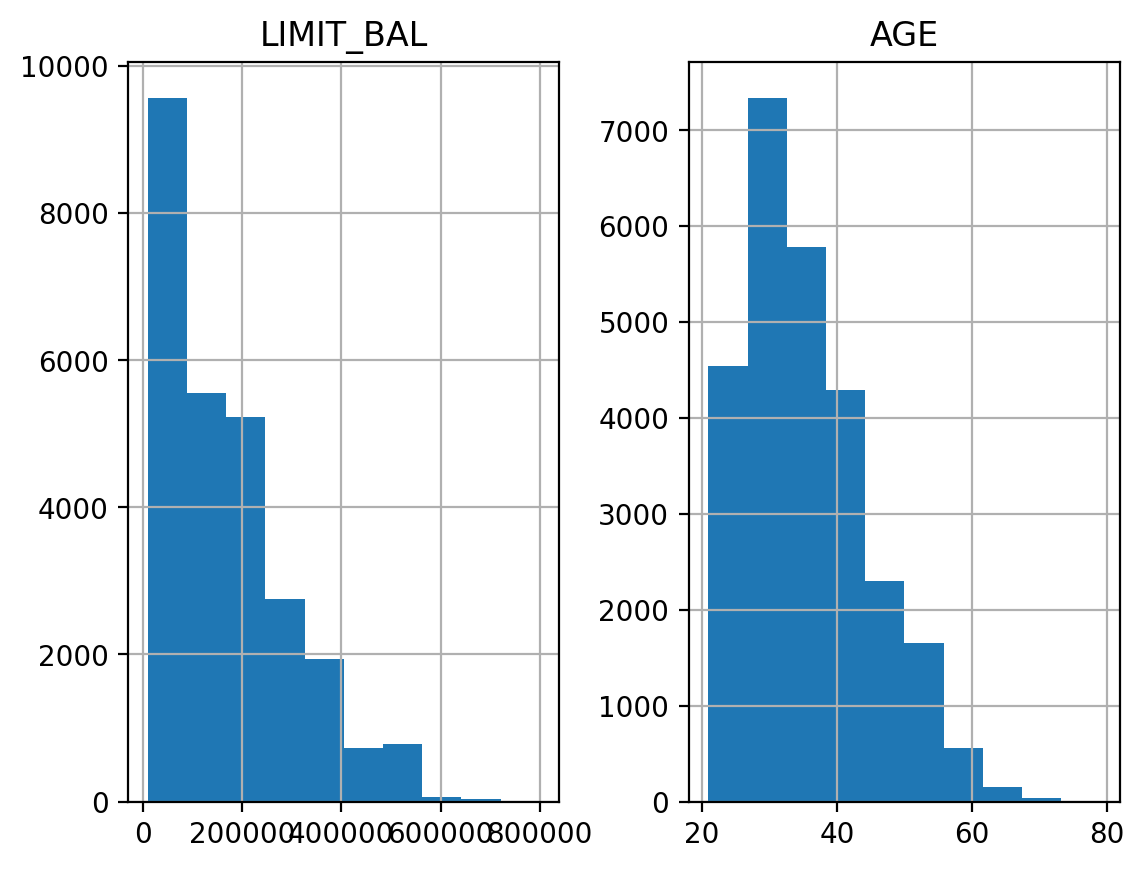

In [33]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()
# Provides a quick visualization of the data

In [34]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


Look for the value counts for the `EDUCATION` we get

In [35]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

If we go back to dictionary, we have the description for (1 = graduation school; 2 = university; 3 = high school; 4 = others).
It's mean that we have undocumented education levels 0, 5 and 6. 

The business partner don't know about these levels, so we can putting all together with **others**.

In [36]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

/tmp/ipykernel_2081/2139885917.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)


In [37]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

Now look for the stats of `MARRIAGE`

In [38]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

Again we have a value undocumented (0) and we can do the same before.

In [39]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

/tmp/ipykernel_2081/3020947443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)


In [40]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

### Encoding

In [41]:
df_clean_2.to_csv('df_clean_2_01.csv', index=False)

df_clean_2 = pd.read_csv('df_clean_2_01.csv')

Text(0.5, 0, 'Education level: ordinal encoding')

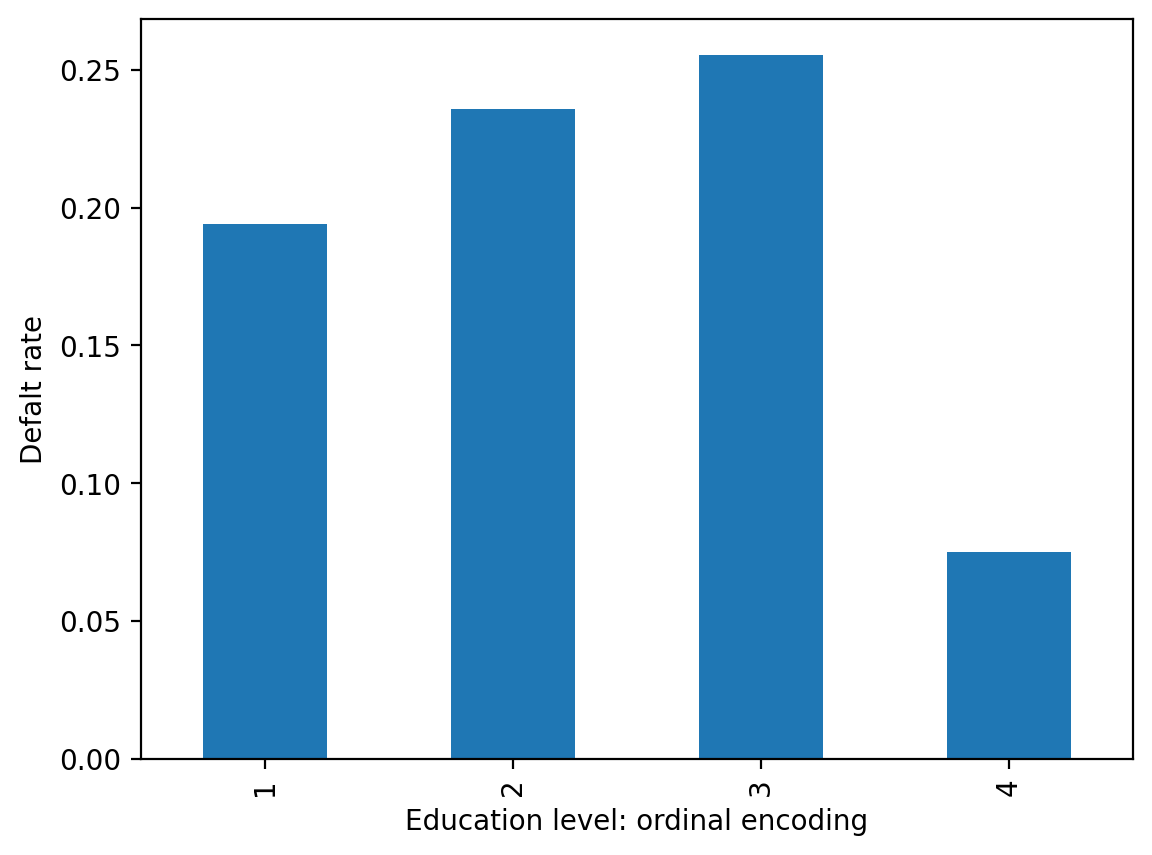

In [42]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Defalt rate')
plt.xlabel('Education level: ordinal encoding')

**One-Hot-Encoding (OHE)** Is a way to transform a categorical feature, which may consist of text labels in the raw data, into a numerical feature that can be used in mathematical models.

In [43]:
# Crate an empty column for the categorical labels called EDUCATION_CAT
df_clean_2['EDUCATION_CAT'] = 'none'

In [44]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [53]:
# Creating a dictionary that describes the mapping for educations categories
cat_mapping = {1:"graduation school", 2:"university", 3:"high school", 4:"others"}

In [54]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduation school
6,1,graduation school
7,2,university
8,3,high school
9,3,high school


In [55]:
edu_one = pd.get_dummies(df_clean_2['EDUCATION_CAT'],dtype=int) # It's important to indicated what's the dtype in the end.
edu_one.head(10)

,graduation school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [56]:
df_with_ohe = pd.concat([df_clean_2,edu_one], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduation school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduation school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduation school,1,0,0,0
6,graduation school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [58]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

# Exploring the Financial History Features in the DataSet

In [59]:
df = pd.read_csv('cleaned_data.csv') 

To analysis the financial history we need to analysis three groups: the status of the monthly payments for the last 6 months, and the billed and paid amounts for the same period.

But now, we will start look at the payment statuses.

In [62]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [63]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [65]:
df[pay_feats[0]].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

 To remember:
 
- -2 means the account started that month with a zero balance and never used any credit
- -1 means the account had a balance that was paid in full
- 0 means that at least the minimum payment was made, but the entire balance wasn't paid.

And the others represent the months with not pay.

We can notice that most part of an account are in (-2, -1, 0), which correspond that them was in good standing last month.

In [68]:
import numpy as np

In [69]:
pay_1_bins = np.array(range(-2,10))-0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

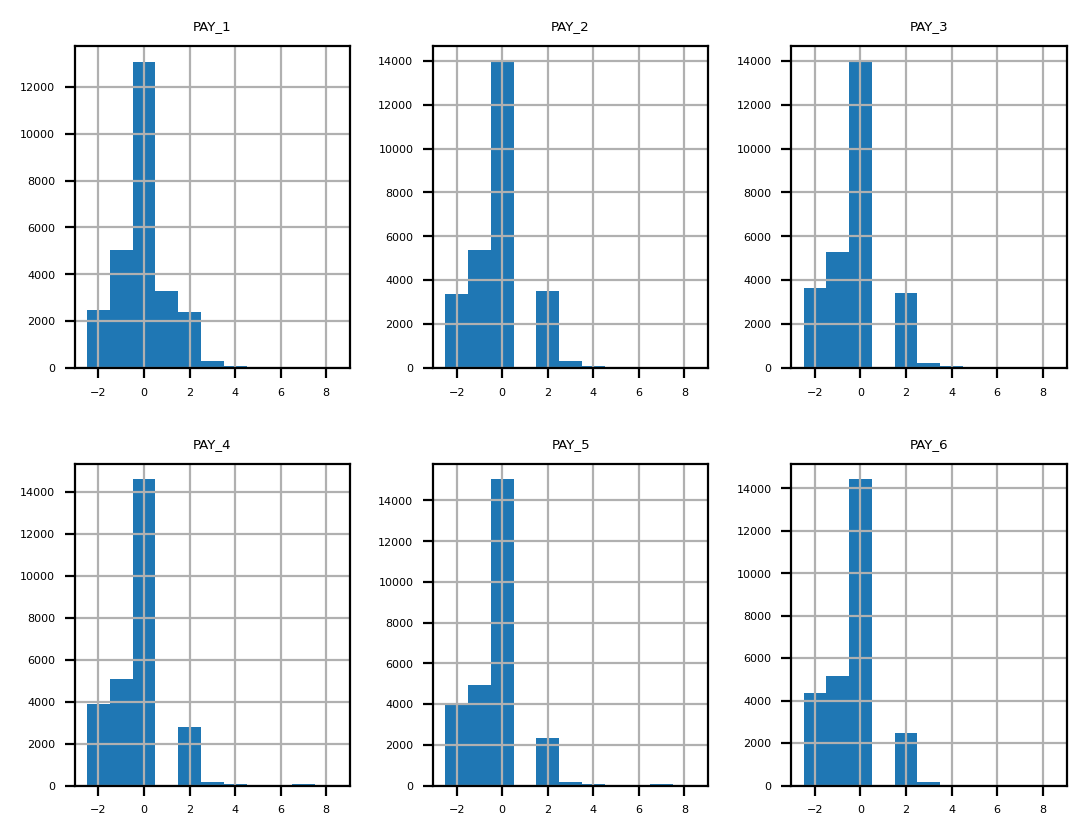

In [76]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

Something it's not good in these plots. If look more, we can notice that only `PAY_1` has information about payment delay for 1 month. The client told lets knows that they had been having problems with pulling the most recent month of data. Only in September, the problem was fixed. This indicated that only the `PAY_1` is representative of future date, which will use to make predictions with the model. 

## Exploring the Remaining Financial Features in the Dataset

In [77]:
from scipy import stats 

In [99]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduation school',
       'high school', 'others', 'university'],
      dtype='object')

In [122]:
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bill_amt_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [147]:
df[pay_amt_feats[0]].value_counts().sort_index()

PAY_AMT1
0         4656
1            8
2           13
3           15
4           16
          ... 
405016       1
423903       1
493358       1
505000       1
873552       1
Name: count, Length: 7425, dtype: int64

In [123]:
df[bill_amt_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

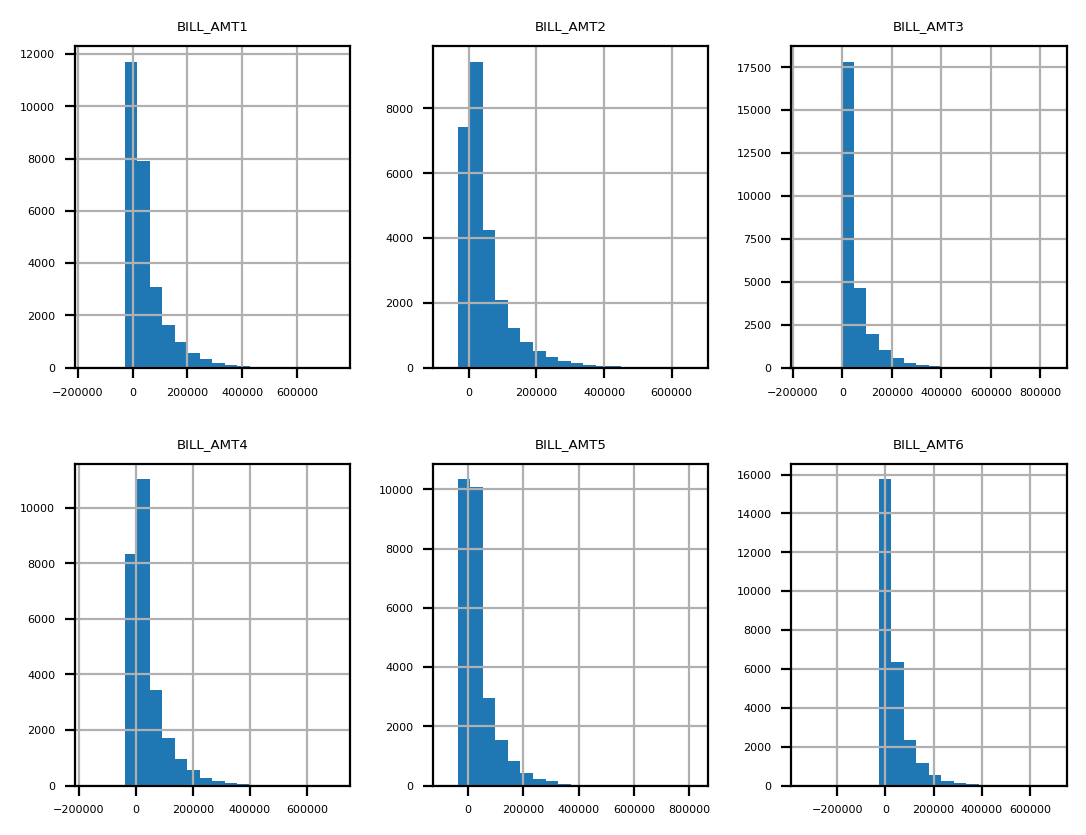

In [124]:
df[bill_amt_feats].hist(bins=20, layout=(2,3))

In [125]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


We notice that mean accounts didn't pay nothing, if we include these numbers in the plot, it's difficult to see other results.  

In [152]:
pay_amt_0 = 0

In [153]:
mask_pay_amt_0 = df[pay_amt_feats] == pay_amt_0
mask_pay_amt_0.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

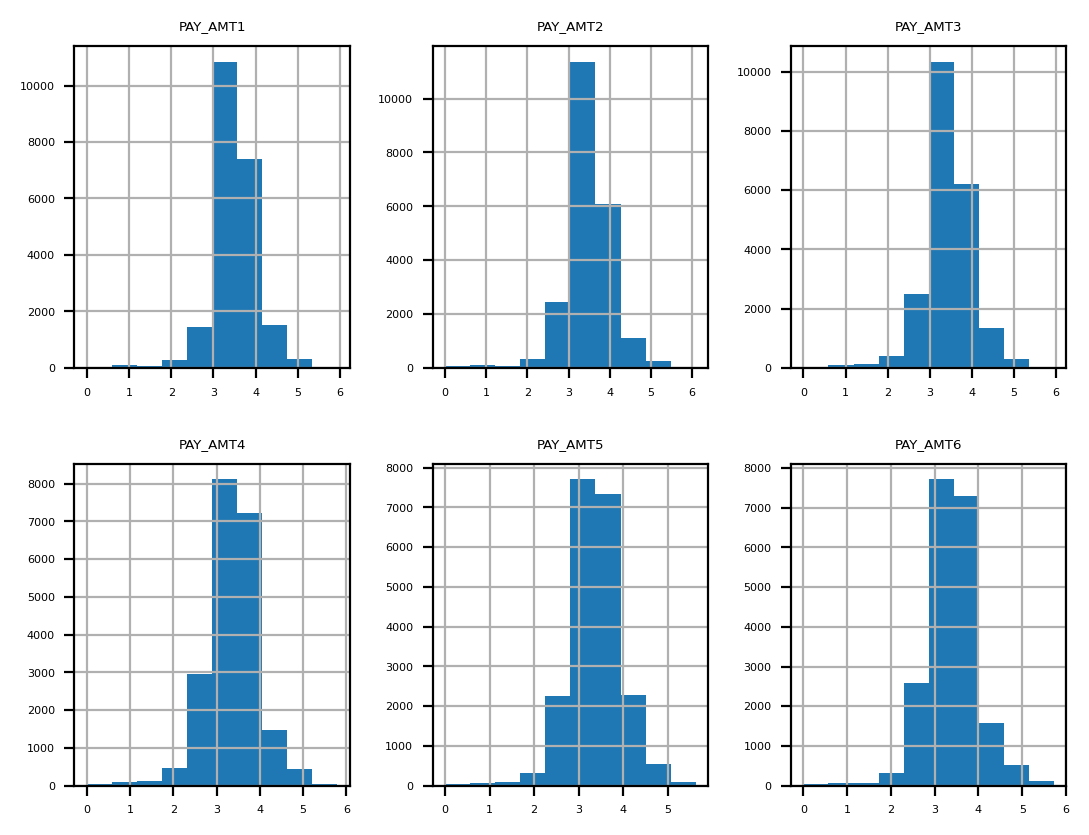

In [154]:
df[pay_amt_feats][~mask_pay_amt_0].apply(np.log10).hist(layout=(2,3))